In [1]:
import numpy as np
from tensorflow import keras
print (keras.__version__)


2.8.0


In [2]:
from keras.datasets import cifar10

#We import data into variables and check their shape.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape


170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train.shape


(50000, 1)

In [4]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
x_train_final = x_train.reshape((-1, 3072))
x_train_final.shape


(50000, 3072)

In [6]:
x_test_final = x_test.reshape((-1, 3072))
x_test_final.shape

(10000, 3072)

In [7]:
x_train_final = x_train_final / 255
x_test_final = x_test_final / 255


In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, input_shape=(3072,), activation='softplus'))
model.add(keras.layers.Dense(256, activation='softplus'))
model.add(keras.layers.Dense(10, activation='softmax'))



In [9]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
results = model.fit(
  x=x_train_final,
  y=y_train,
  shuffle=True,
  epochs=50,
  batch_size=16,
  validation_data=(x_test_final, y_test)

)


Epoch 1/50
3125/3125 [==============================] - 15s 4ms/step - loss: 1.9287 - accuracy: 0.3050 - val_loss: 1.8165 - val_accuracy: 0.3443
Epoch 2/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7749 - accuracy: 0.3680 - val_loss: 1.7242 - val_accuracy: 0.3848
Epoch 3/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.6986 - accuracy: 0.3966 - val_loss: 1.6662 - val_accuracy: 0.4001
Epoch 4/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.6475 - accuracy: 0.4196 - val_loss: 1.6518 - val_accuracy: 0.4158
Epoch 5/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.6091 - accuracy: 0.4312 - val_loss: 1.6037 - val_accuracy: 0.4324
Epoch 6/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5771 - accuracy: 0.4426 - val_loss: 1.5650 - val_accuracy: 0.4500
Epoch 7/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5464 - accuracy: 0.4538 - val_loss: 1.5419 - val_ac

In [11]:
eval = model.evaluate(x=x_test_final, y=y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.3972 - accuracy: 0.5296


Text(0, 0.5, 'Losses')

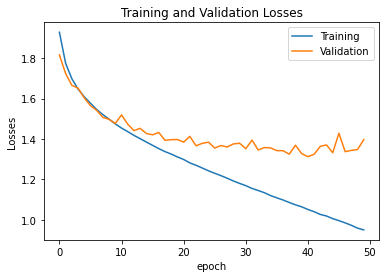

In [12]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'Accuracy')

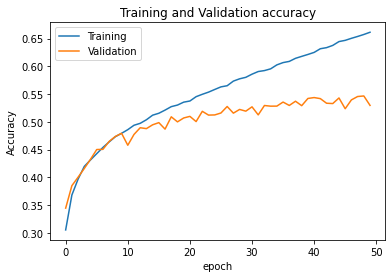

In [13]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [14]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
